In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Numerical Integration of the paraxial propagation equation

We shall work with the following equation:
$$\frac{\partial \varepsilon}{\partial z}=\frac{i}{2k_0}  \Delta_T\varepsilon + k^2\delta\epsilon\varepsilon,  \qquad(Eq. 1)
$$
First though, we shall ignore the term due to the atmosphere, and work only in 1D:
$$
\frac{\partial \varepsilon}{\partial z}=\frac{i}{2k_0}\frac{\partial ^2 \varepsilon}{\partial x^2}
$$
Using the fourier transform technique, where epsilon is a gaussian respresented as:
$$\varepsilon(x,y)=\exp\left(-\frac{x^2+y^2}{w^2}\right) \implies \varepsilon(x) = \exp\left(-\frac{x^2}{w^2}\right)$$

We shall use the techniques described in the jupyter notebook starting with defining the gauss class

In [40]:
class Gaussian:
    """Gaussian function"""
    def __init__(self, width, amplitude, x0):
        """Create Gaussian with the given width and amplitude, centered at x = x0"""
        self.width = width
        self.amplitude = amplitude
        self.x0 = x0
        
    def __call__(self, x):
        return self.amplitude*np.exp(-(x-self.x0)**2/self.width**2)

In [41]:
gauss = Gaussian(1, 1, 0)
print(gauss(0.5))
print(gauss(np.array([0, 1, 2, 3])))

0.7788007830714049
[1.00000000e+00 3.67879441e-01 1.83156389e-02 1.23409804e-04]


Now we define a class to advance the solution from $t$ to $t+\Delta t$ using the following guidelines:


This class should create the spatial $x$ and spectral $k$ grids (consider using the function numpy.fft.fftfreq), set the parameters $D$ and $V$, and provide a way to set the initial condition. It should also define the method  ```step(self, dt)``` for evolving $u(x,t) \to u(x,t+\Delta t)$. This method contains the core of the algorithm, i.e., the three substeps:

1) Transform $u(x,t) \to \hat u(k,t)$ using FFT

2) Advance one time step $\Delta t$ using Eq. (P)

3) Transform $\hat u(k,t) \to u(x,t)$  using FFT$^{-1}$

In [42]:
class Spectral:
    def __init__(self, L, number_of_points, k_0, width=None):
        self.L = L #width of initial aperture as far as I understand
        self.n = number_of_points
        self.D = 1j/(2*k_0)
        self.w = width
        
        #now we initialize the spatial grid:
        self.x = np.linspace(0, L, self.n)
        self.dx = self.x[1] - self.x[0]
        
        #then for the k grid = 2pi np.fft.fftfreq(n, self.dx)
        self.k = 2 * np.pi * np.fft.fftfreq(self.n, self.dx)
        
        
        self.u = None
        
        
    def initialize(self, function):
        self.u = function(self.x)
        
    def step(self, dz):
        u_hat = np.fft.fft(self.u)
        
        u_hat *= np.exp(-(self.D*self.k**2*dz))
        
        self.u = np.fft.ifft(u_hat)

Write a function ```advance(spectral, T, N)``` that evolves $u(x,0) \to u(x,T)$ using $N$ steps

In [58]:
def advance(spectral, T, N):
    dt = T / N
    for _ in range(N):
        spectral.step(dt)
    return spectral.u


In [94]:
spectral = Spectral(10, 1000, 9*10**6)

In [95]:
spectral.initialize(gauss)

In [96]:
a = abs(advance(spectral, 10, 10))

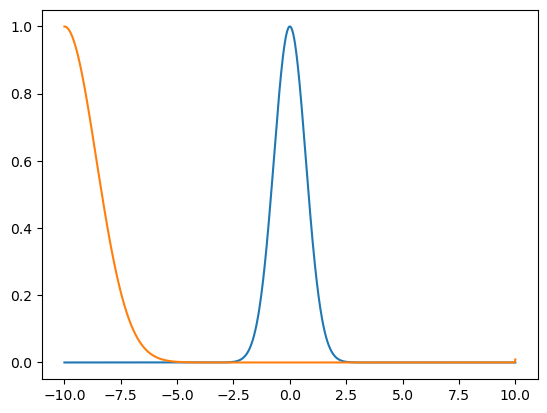

In [102]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, gauss(x))
plt.plot(x, a)
